### **House Prices - Advanced Regression Techniques**

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv(r'D:\ML Belajarrrr\HousePrices\Data\train.csv')

In [3]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Sale Prices Feature**

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
print(train_data['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


**Penjelasan**

Mean jauh lebih besar dari Median, berarti ada rumah-rumah yang harganya sangat mahal (pencilan).

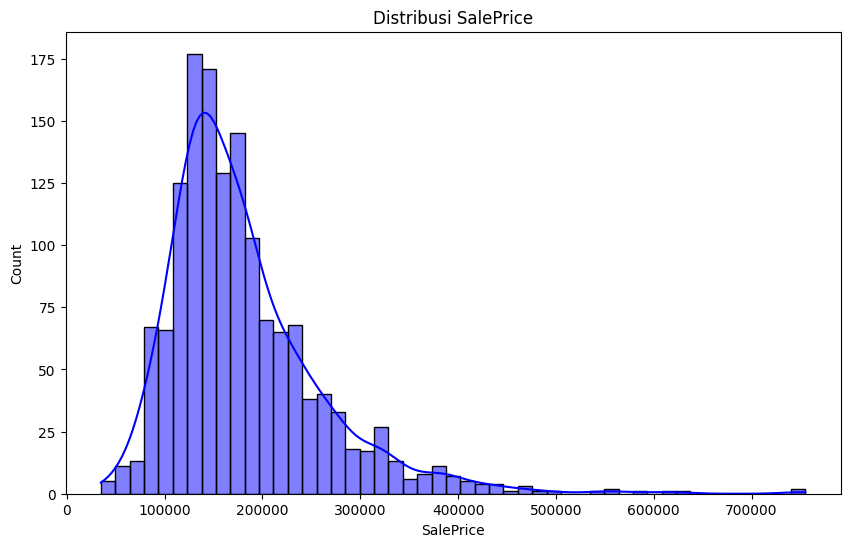

Skewness: 1.8828757597682129


In [8]:
# Plot Distribusi SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice'], kde= True, color='blue')
plt.title('Distribusi SalePrice')
plt.show()

# Cek Skewness
print(f'Skewness: {train_data['SalePrice'].skew()}')

**Penjelasan**

1. Analisis Grafik dan Nilai Skewness
    * Positive Skewness (Menceng ke arah kanan): Grafiknya memiliki "ekor" yang panjang ke arah kanan. Ini artinya mayoritas rumah berada di harga "murah", tetapi beberapa rumah mewah yang harganya sangat tinggi.
    * Nilai 1.88: Nilai skewness di atas 1 menunjukkan distribusi highly skewed atau sangat menceng. Dalam statistik dan machine learning, kondisi ini kurang ideal karena model bisa jadi terlalu fokus pada harga rata-rata dan gagal memprediksi harga rumah mewah dengan akurat.
2. Solusi: Log-Transformation
   * Nilai yang sangat besar akan "ditarik" mendekati pusat.
   * Rentang data menjadi lebih kecil dan stabil.

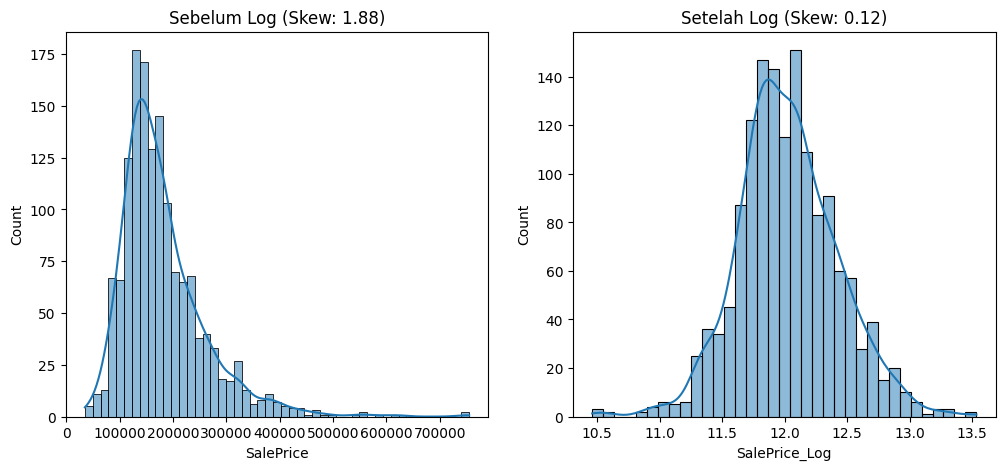

In [9]:
import numpy as np

# Melakukan Log Transformation
train_data['SalePrice_Log'] = np.log1p(train_data['SalePrice'])

# Plot Perbandingan
plt.figure(figsize=(12, 5))

# Kiri
plt.subplot(1, 2, 1)
sns.histplot(train_data['SalePrice'], kde=True)
plt.title(f'Sebelum Log (Skew: {train_data['SalePrice'].skew():.2f})')

# Kanan
plt.subplot(1, 2, 2)
sns.histplot(train_data['SalePrice_Log'], kde=True)
plt.title(f'Setelah Log (Skew: {train_data['SalePrice_Log'].skew():.2f})')

plt.show()

**Penjelasan**

Setelah dilakukan Log Transformation maka nilai skewness menjadi 0.12, hal ini berarti nilai skew sudah turun cukup banyak dari 
1.88 ke 0.12.

### **Cek Fitur yang Paling Berpengaruh**

In [10]:
# Mengambil hanya kolom numerik
numeric_df = train_data.select_dtypes(include=['int64', 'float64'])

# Menghitung korelasi
corr_matrix = numeric_df.corr()

# Mengambil korelasi khusus untuk SalePrice dan mengurutkannya
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False).head(11)

print('10 Fitur dengan Korelasi Tertinggi terhadap SalePrice: ')
print(top_corr_features)

10 Fitur dengan Korelasi Tertinggi terhadap SalePrice: 
SalePrice        1.000000
SalePrice_Log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
Name: SalePrice, dtype: float64


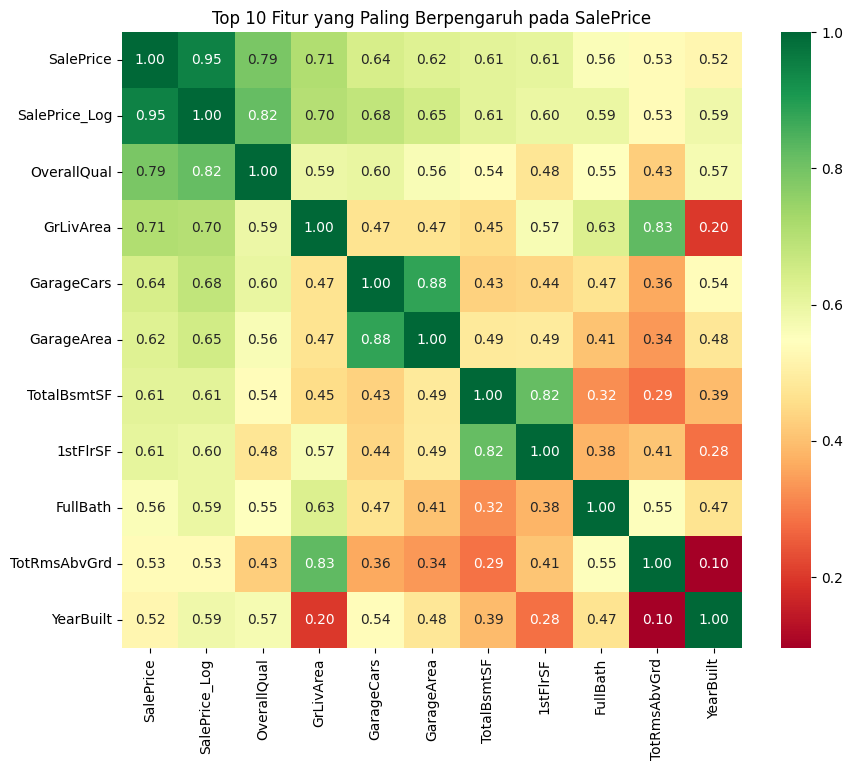

In [11]:
# Memvisualisasikan 

import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil nama-nama fitur teratas
cols = top_corr_features.index

# Membuat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(train_data[cols].corr(), annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Top 10 Fitur yang Paling Berpengaruh pada SalePrice')
plt.show()


### **Analisis Kolom yang Paling Berpengaruh**

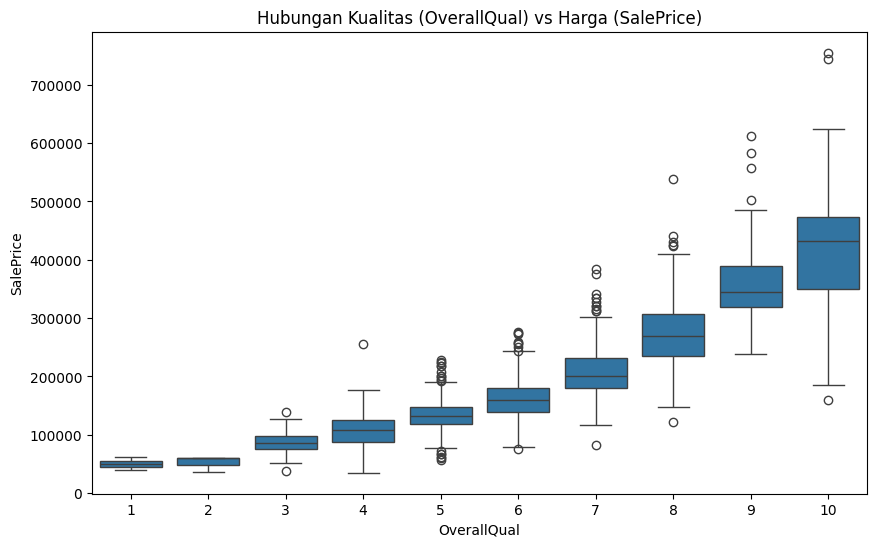

In [12]:
# Kolom OverallQuall

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('Hubungan Kualitas (OverallQual) vs Harga (SalePrice)')
plt.show()

**Penjelasan**

Dari boxplot di atas menunjukkan bahwa semakin tinggi kualitas, maka harganya juga semakin naik secara konsisten.

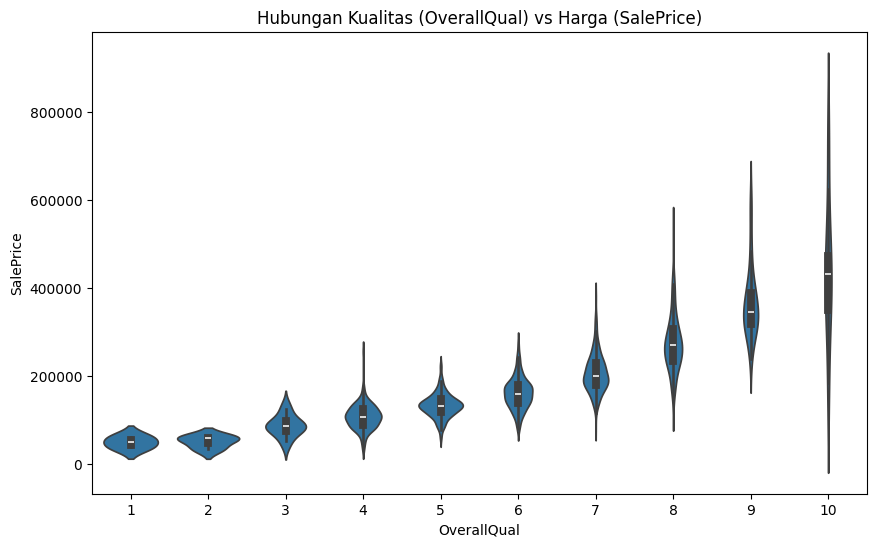

In [13]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_data['OverallQual'], y=train_data['SalePrice'])
plt.title('Hubungan Kualitas (OverallQual) vs Harga (SalePrice)')
plt.show()

**Penjelasan**

1. Tren Kenaikan yang Eksponensial: Semakin ke kanan, posisi biola-nya semakin naik ke atas seperti pada kualitas 8, 9, 10. Kenaikan jauh lebih tajam dibanding kenaikan dari kualitas 1 ke 2. Hal ini membuktika bahwa rumah dengan kualitas "Very Excellent" memiliki nilai prestise yang sangat tinggi.
2. Lebar Biola (Densitas)
   * Pada kualitas 5 dan 6, perut biolanya sangat gendut. Ini artinya mayoritas rumah di dataset kamu memiliki kualitas rata-rata atau sedikit di atas rata-rata.
   * Pada kualitas 10, biolanya sangat kurus dan panjang. Ini artinya jumlah rumahnya sedikit, tapi rentang harganya sangat bervariasi (ada yang mahal, ada yang sangat mahal).
3. Garis Putih (Median): Titik putih di tengah biola menunjukkan nilai tengah harga. Garis ini naik secara konsisten, yang memvalidasi bahwa OverallQual adalah prediktor yang sangat stabil untuk model


C:\Users\HELWA\AppData\Local\Temp\ipykernel_16496\3272422034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_data['OverallQual'], palette='viridis')


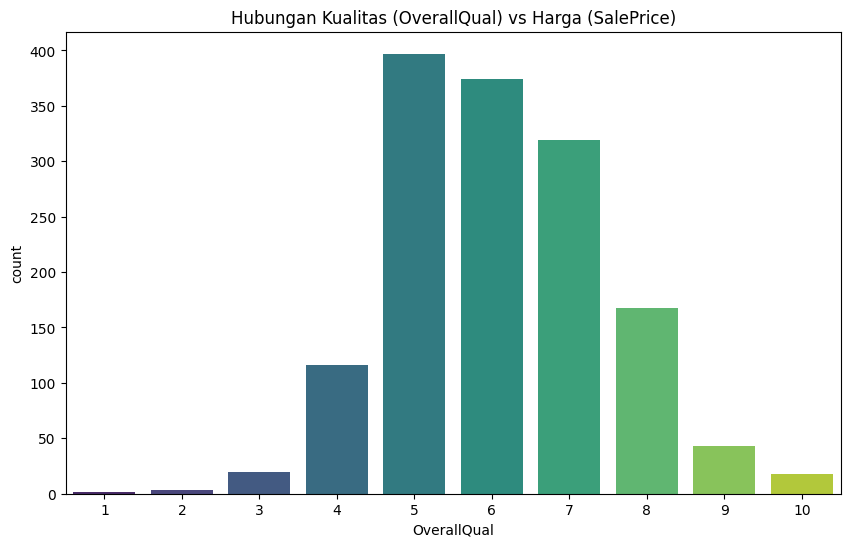

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x=train_data['OverallQual'], palette='viridis')
plt.title('Hubungan Kualitas (OverallQual) vs Harga (SalePrice)')
plt.show()

**Menemukan Outlier/Gangguan**

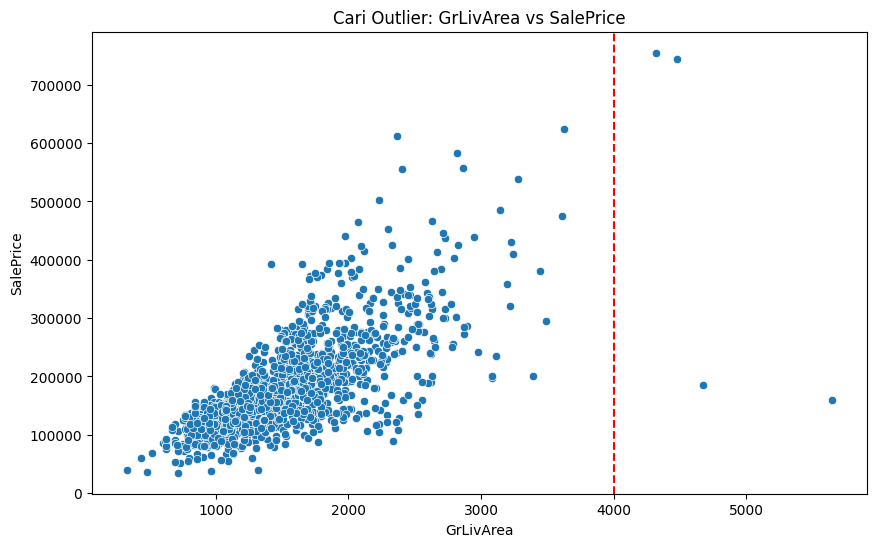

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
# Menggunakan SalePrice asli agar outlier-nya terlihat jelas secara fisik
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.title('Cari Outlier: GrLivArea vs SalePrice')
plt.axvline(x=4000, color='r', linestyle='--')
plt.show()

**Penjelasan**

1. **2 Titik di Kanan Atas**: Ini adalah rumah yang sangat luas dan harganya pun sangat mahal (di atas $700.000$). Ini dianggap normal karena mengikuti hukum pasar: luas bertambah, harga naik
2. **2 Titik di Kanan Bawah**: Nah, ini dia "tersangka" utamanya! Rumah ini luasnya luar biasa (bahkan ada yang $> 5000$), tapi harganya justru sangat rendah (di bawah $200.000$).


**Hapus Outlier**

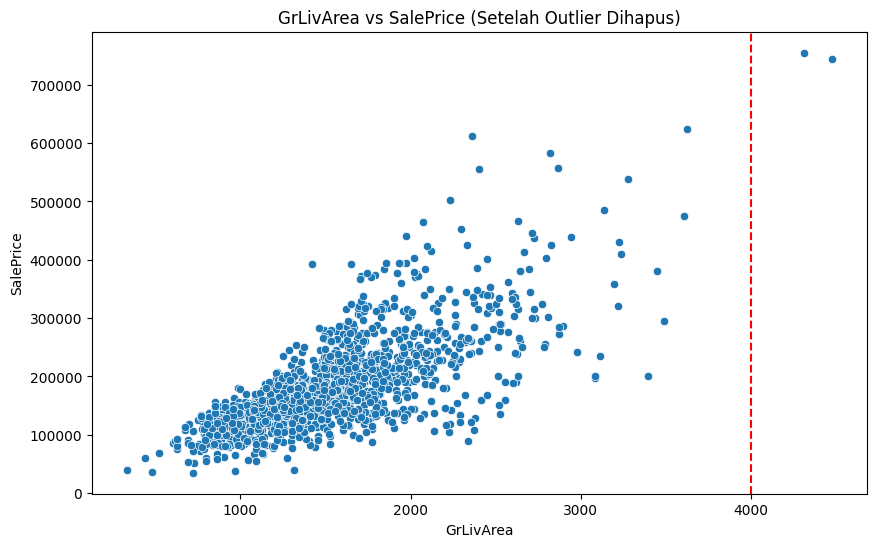

In [16]:
# Menghapus outlier berdasarkan koordinat di grafik tadi
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index)

# Cek kembali grafiknya untuk memastikan sudah bersih
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['GrLivArea'], y=train_data['SalePrice'])
plt.axvline(x=4000, color='r', linestyle='--')
plt.title('GrLivArea vs SalePrice (Setelah Outlier Dihapus)')
plt.show()

In [17]:
# Menghitung jumlah missing values per kolom
missing_data = train_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (train_data.isnull().sum() / train_data.isnull().count()).sort_values(ascending=False)

# Menampilkan 20 kolom teratas yang paling banyak kosong
missing_info = pd.concat([missing_data, missing_percentage], axis=1, keys=['Total', 'Percent'])
print(missing_info.head(20))

              Total   Percent
PoolQC         1452  0.995885
MiscFeature    1404  0.962963
Alley          1367  0.937586
Fence          1177  0.807270
MasVnrType      872  0.598080
FireplaceQu     690  0.473251
LotFrontage     259  0.177641
GarageQual       81  0.055556
GarageYrBlt      81  0.055556
GarageFinish     81  0.055556
GarageType       81  0.055556
GarageCond       81  0.055556
BsmtExposure     38  0.026063
BsmtFinType2     38  0.026063
BsmtQual         37  0.025377
BsmtFinType1     37  0.025377
BsmtCond         37  0.025377
MasVnrArea        8  0.005487
Electrical        1  0.000686
HouseStyle        0  0.000000


**Pengisian Missing Values**

In [18]:
# Data Kategorikal
feat_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'MasVnrType']

# Mengisi missing value dengan 'None'
for col in feat_none:
    train_data[col] = train_data[col].fillna('None')
    
# Cek apakah kolom-kolom tersebut sudah bersih
print(train_data[feat_none].isnull().sum())

PoolQC          0
MiscFeature     0
Alley           0
Fence           0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
MasVnrType      0
dtype: int64


In [19]:
train_data.PoolQC.describe()

count     1458
unique       4
top       None
freq      1452
Name: PoolQC, dtype: object

In [20]:
print(train_data.PoolQC)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Name: PoolQC, Length: 1458, dtype: object


In [21]:
# Data Numerikal
feat_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
             'BsmtFullBath', 'BsmtHalfBath', 'BsmtFinSF1', 'BsmtFinSF2',
             'BsmtUnfSF']

for col in feat_zero:
    train_data[col] = train_data[col].fillna(0)
    
# Cek apakah kolom tersebut sudah bersih dari missing values
print(train_data[feat_zero].isnull().sum())


GarageYrBlt     0
GarageArea      0
GarageCars      0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
dtype: int64


In [22]:
# Mengisi LotFrontage dengan nilai median dari Neighborhood yang sama
train_data['LotFrontage'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Cek apakah masih ada yang kosong
print(f'Sisa missing values di LotFrontage: {train_data['LotFrontage'].isnull().sum()}')

Sisa missing values di LotFrontage: 0


In [23]:
# Data Kategorikal Nomimal
cols_to_fix = ['Electrical', 'MSZoning', 'Utilities', 'Functional', 'SaleType', 'Exterior1st', 'Exterior2nd', 'KitchenQual']

for col in cols_to_fix:
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

# Cek Hasil
print(f'Total Missing Values: {train_data.isnull().sum().sum()}')

Total Missing Values: 0


**Feature Engineering**

In [24]:
# Membuat Fitur TotalSF (Total Square Feet)
# Menggabungkan beberapa fitur untuk melihat total luas bangunan

train_data['TotalSF'] = train_data['1stFlrSF'] + train_data['2ndFlrSF'] + train_data['TotalBsmtSF']

# Membuat fitur total kamar mandi
train_data['TotalBath'] = (train_data['FullBath'] + (0.5 * train_data['HalfBath']) +
                           train_data['BsmtFullBath'] + (0.5 * train_data['BsmtHalfBath']))

# Menghitung usia rumah saat terjual
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']

**Cek Kualitas Data Saat Ini**

In [25]:
# Cek korelasi fitur baru
features_to_check = ['TotalSF', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'HouseAge', 'YearBuilt', 'SalePrice']
new_corr = train_data[features_to_check].corr()

print(new_corr['SalePrice'].sort_values(ascending=False))

SalePrice      1.000000
TotalSF        0.832877
TotalBsmtSF    0.651153
1stFlrSF       0.631530
YearBuilt      0.523608
2ndFlrSF       0.320532
HouseAge      -0.524067
Name: SalePrice, dtype: float64


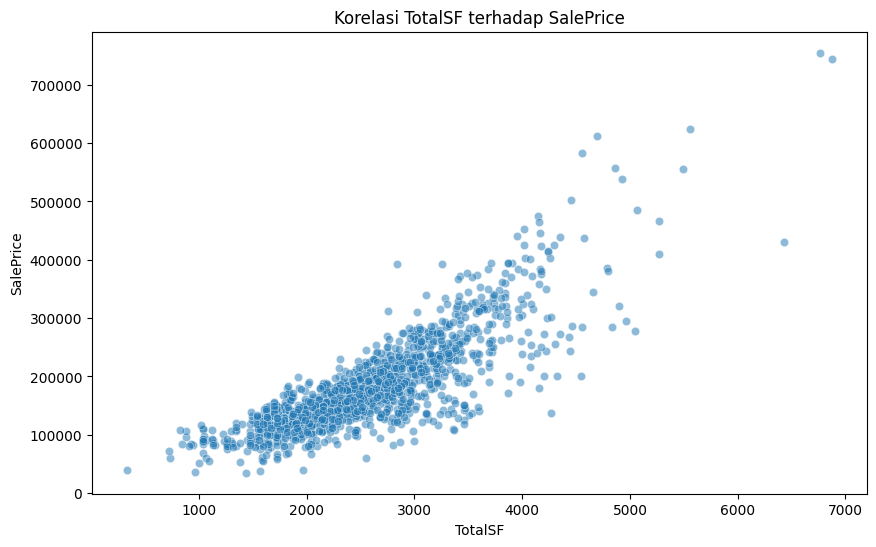

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='TotalSF', y='SalePrice', alpha=0.5)
plt.title('Korelasi TotalSF terhadap SalePrice')
plt.show()

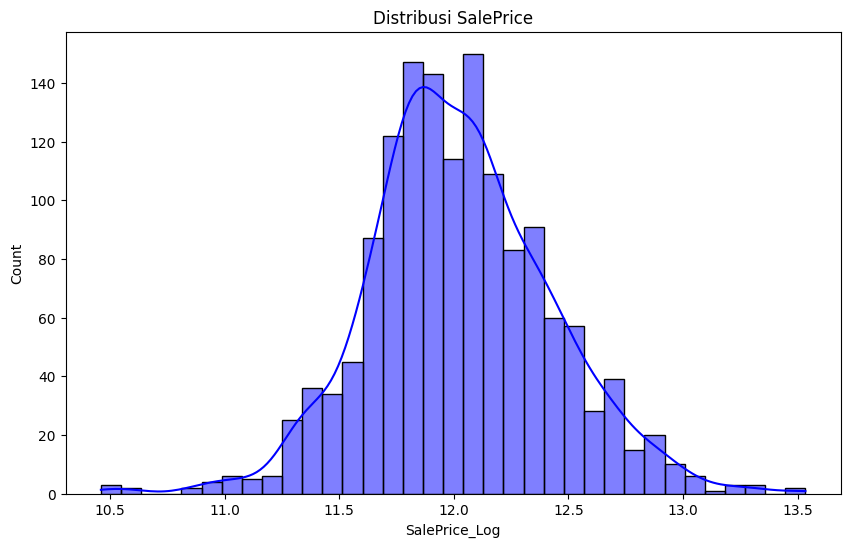

Skewness: 0.12157976050304882


In [27]:
# Plot Distribusi SalePrice_Log
plt.figure(figsize=(10, 6))
sns.histplot(train_data['SalePrice_Log'], kde= True, color='blue')
plt.title('Distribusi SalePrice')
plt.show()

# Cek Skewness
print(f'Skewness: {train_data['SalePrice_Log'].skew()}')

In [28]:
# Label Encoding (Ordinal): Digunakan pada fitur yang memiliki urutan/peringkat bertingkat
# Daftar kolom yang menggunakan skala kualitas tersebut
qual_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC']

# Membuat kamus pemetaan untuk kualitas
qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

for col in qual_cols:
    train_data[col] = train_data[col].map(qual_map)

In [29]:
# Pemetaan BsmtExposure
train_data['BsmtExposure'] = train_data['BsmtExposure'].map({'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4})

# Pemetaan BsmtFinType
fin_type_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map(fin_type_map)
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map(fin_type_map)

# Pemetaan Functional
func_map = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal': 1}
train_data['Functional'] = train_data['Functional'].map(func_map)

# Pemetaan GarageFinish
train_data['GarageFinish'] = train_data['GarageFinish'].map({'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3})

# Pemetaan Fence
train_data['Fence'] = train_data['Fence'].map({'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4})

**One Hot Encoding**

In [30]:
# Mencari kolom kategori sisa yang tipenya masih 'object'
remaining_cat_cols = train_data.select_dtypes(include=['object']).columns

print(f'Kolom yang akan diproses: {list(remaining_cat_cols)}')

Kolom yang akan diproses: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


In [31]:
# Melakukan one-hot encoding
train_data = pd.get_dummies(train_data, columns=remaining_cat_cols)

# Cek ukuran data
print(f'Ukuran data setalah One-Hot: {train_data.shape}')

Ukuran data setalah One-Hot: (1458, 238)


**Cek Data**

In [32]:
# Cek apakah masih ada kolom bertipe data 'object' 
remaining_objects = train_data.select_dtypes(include=['object']).columns
print(f'Kolom teks yang tersisa: {len(remaining_objects)}')

Kolom teks yang tersisa: 0


In [33]:
# Cek statistik dasar
print(train_data.iloc[:, :10].describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1458.000000  1458.000000  1458.000000    1458.000000  1458.000000   
mean    730.251715    56.893004    69.986626   10459.936900     6.093964   
std     421.601532    42.329437    21.470375    9859.198156     1.376369   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.250000    20.000000    60.000000    7544.500000     5.000000   
50%     730.500000    50.000000    70.000000    9475.000000     6.000000   
75%    1094.750000    70.000000    80.000000   11600.000000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea    ExterQual  
count  1458.000000  1458.000000   1458.000000  1458.000000  1458.000000  
mean      5.576132  1971.218107   1984.834019   102.189986     3.393690  
std       1.113359    30.193754     20.641760   179.109864     0.571589  
min       1.000000 

In [34]:
# Cek Korelasi Final terhadap Target
final_corr = train_data.corr()['SalePrice_Log'].sort_values(ascending=False)

print('Top 10 Fitur Pendukung Harga Tinggi: ')
print(final_corr.head(10))

print("\nTop 10 Fitur Penurun Harga (Korelasi Negatif):")
print(final_corr.tail(10))

Top 10 Fitur Pendukung Harga Tinggi: 
SalePrice_Log    1.000000
SalePrice        0.948396
TotalSF          0.825326
OverallQual      0.821405
GrLivArea        0.725211
ExterQual        0.682226
GarageCars       0.681033
TotalBath        0.676678
KitchenQual      0.669990
GarageArea       0.656129
Name: SalePrice_Log, dtype: float64

Top 10 Fitur Penurun Harga (Korelasi Negatif):
Foundation_BrkTil   -0.251691
PavedDrive_N        -0.286337
LotShape_Reg        -0.289847
GarageType_None     -0.322994
Foundation_CBlock   -0.337909
MSZoning_RM         -0.347453
CentralAir_N        -0.351598
MasVnrType_None     -0.388094
GarageType_Detchd   -0.388681
HouseAge            -0.587767
Name: SalePrice_Log, dtype: float64


In [35]:
print(train_data[qual_cols].dtypes)

ExterQual      int64
ExterCond      int64
BsmtQual       int64
BsmtCond       int64
HeatingQC      int64
KitchenQual    int64
FireplaceQu    int64
GarageQual     int64
GarageCond     int64
PoolQC         int64
dtype: object


In [36]:
print(train_data[qual_cols].isnull().sum())

ExterQual      0
ExterCond      0
BsmtQual       0
BsmtCond       0
HeatingQC      0
KitchenQual    0
FireplaceQu    0
GarageQual     0
GarageCond     0
PoolQC         0
dtype: int64


In [37]:
from sklearn.model_selection import train_test_split

# Pisahkan Fitur (X) dan Target (y)
X = train_data.drop(['SalePrice', 'SalePrice_Log'], axis=1)
y = train_data['SalePrice_Log']

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Siap tempur dengan {X_train.shape[1]} fitur!")

Siap tempur dengan 236 fitur!


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Inisialisasi Model
# n_estimators=100 artinya kita menggunakan 100 pohon keputusan
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. Training Model (Proses Belajar)
# Model akan mencari pola hubungan antara X_train dan y_train (SalePrice_Log)
model_rf.fit(X_train, y_train)

# 3. Prediksi
# Kita minta model menebak harga untuk data yang belum pernah dia lihat (X_test)
y_pred = model_rf.predict(X_test)

# 4. Hitung RMSE (Root Mean Squared Error)
# Karena target kita dalam bentuk Log, RMSE ini mencerminkan persentase error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Skor RMSE Model Random Forest: {rmse:.4f}")

Skor RMSE Model Random Forest: 0.1420


In [39]:
# Mengembalikan nilai log ke nilai dollar asli
y_test_asli = np.expm1(y_test)
y_pred_asli = np.expm1(y_pred)

# Melihat 5 perbandingan pertama
import pandas as pd
hasil_banding = pd.DataFrame({'Asli': y_test_asli, 'Prediksi': y_pred_asli})
print(hasil_banding.head())

          Asli       Prediksi
1322  190000.0  211781.115563
837   100000.0   92072.203407
413   115000.0  110612.591951
522   159000.0  153132.680608
1036  315500.0  312267.724223
